In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [56]:
df = pd.read_csv("dataset/watson_healthcare_modified.csv")

In [57]:
df.shape

(1676, 35)

In [58]:
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [59]:
df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [60]:
df=df.drop_duplicates()
df= df.drop(["EmployeeID","Over18","EmployeeCount","StandardHours"],axis = 1)

In [61]:
df.shape

(1676, 31)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 0 to 1675
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1676 non-null   int64 
 1   Attrition                 1676 non-null   object
 2   BusinessTravel            1676 non-null   object
 3   DailyRate                 1676 non-null   int64 
 4   Department                1676 non-null   object
 5   DistanceFromHome          1676 non-null   int64 
 6   Education                 1676 non-null   int64 
 7   EducationField            1676 non-null   object
 8   EnvironmentSatisfaction   1676 non-null   int64 
 9   Gender                    1676 non-null   object
 10  HourlyRate                1676 non-null   int64 
 11  JobInvolvement            1676 non-null   int64 
 12  JobLevel                  1676 non-null   int64 
 13  JobRole                   1676 non-null   object
 14  JobSatisfaction         

In [63]:
df['Attrition'].value_counts()

No     1477
Yes     199
Name: Attrition, dtype: int64

In [64]:
# num_col = df.select_dtypes(include=np.number)
# cat_col = df.select_dtypes(exclude=np.number)

# for col in num_col:
#     sns.boxplot(data=df[col])
#     plt.show()

# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# print("Number of rows after removing outliers: ", df.shape[0])

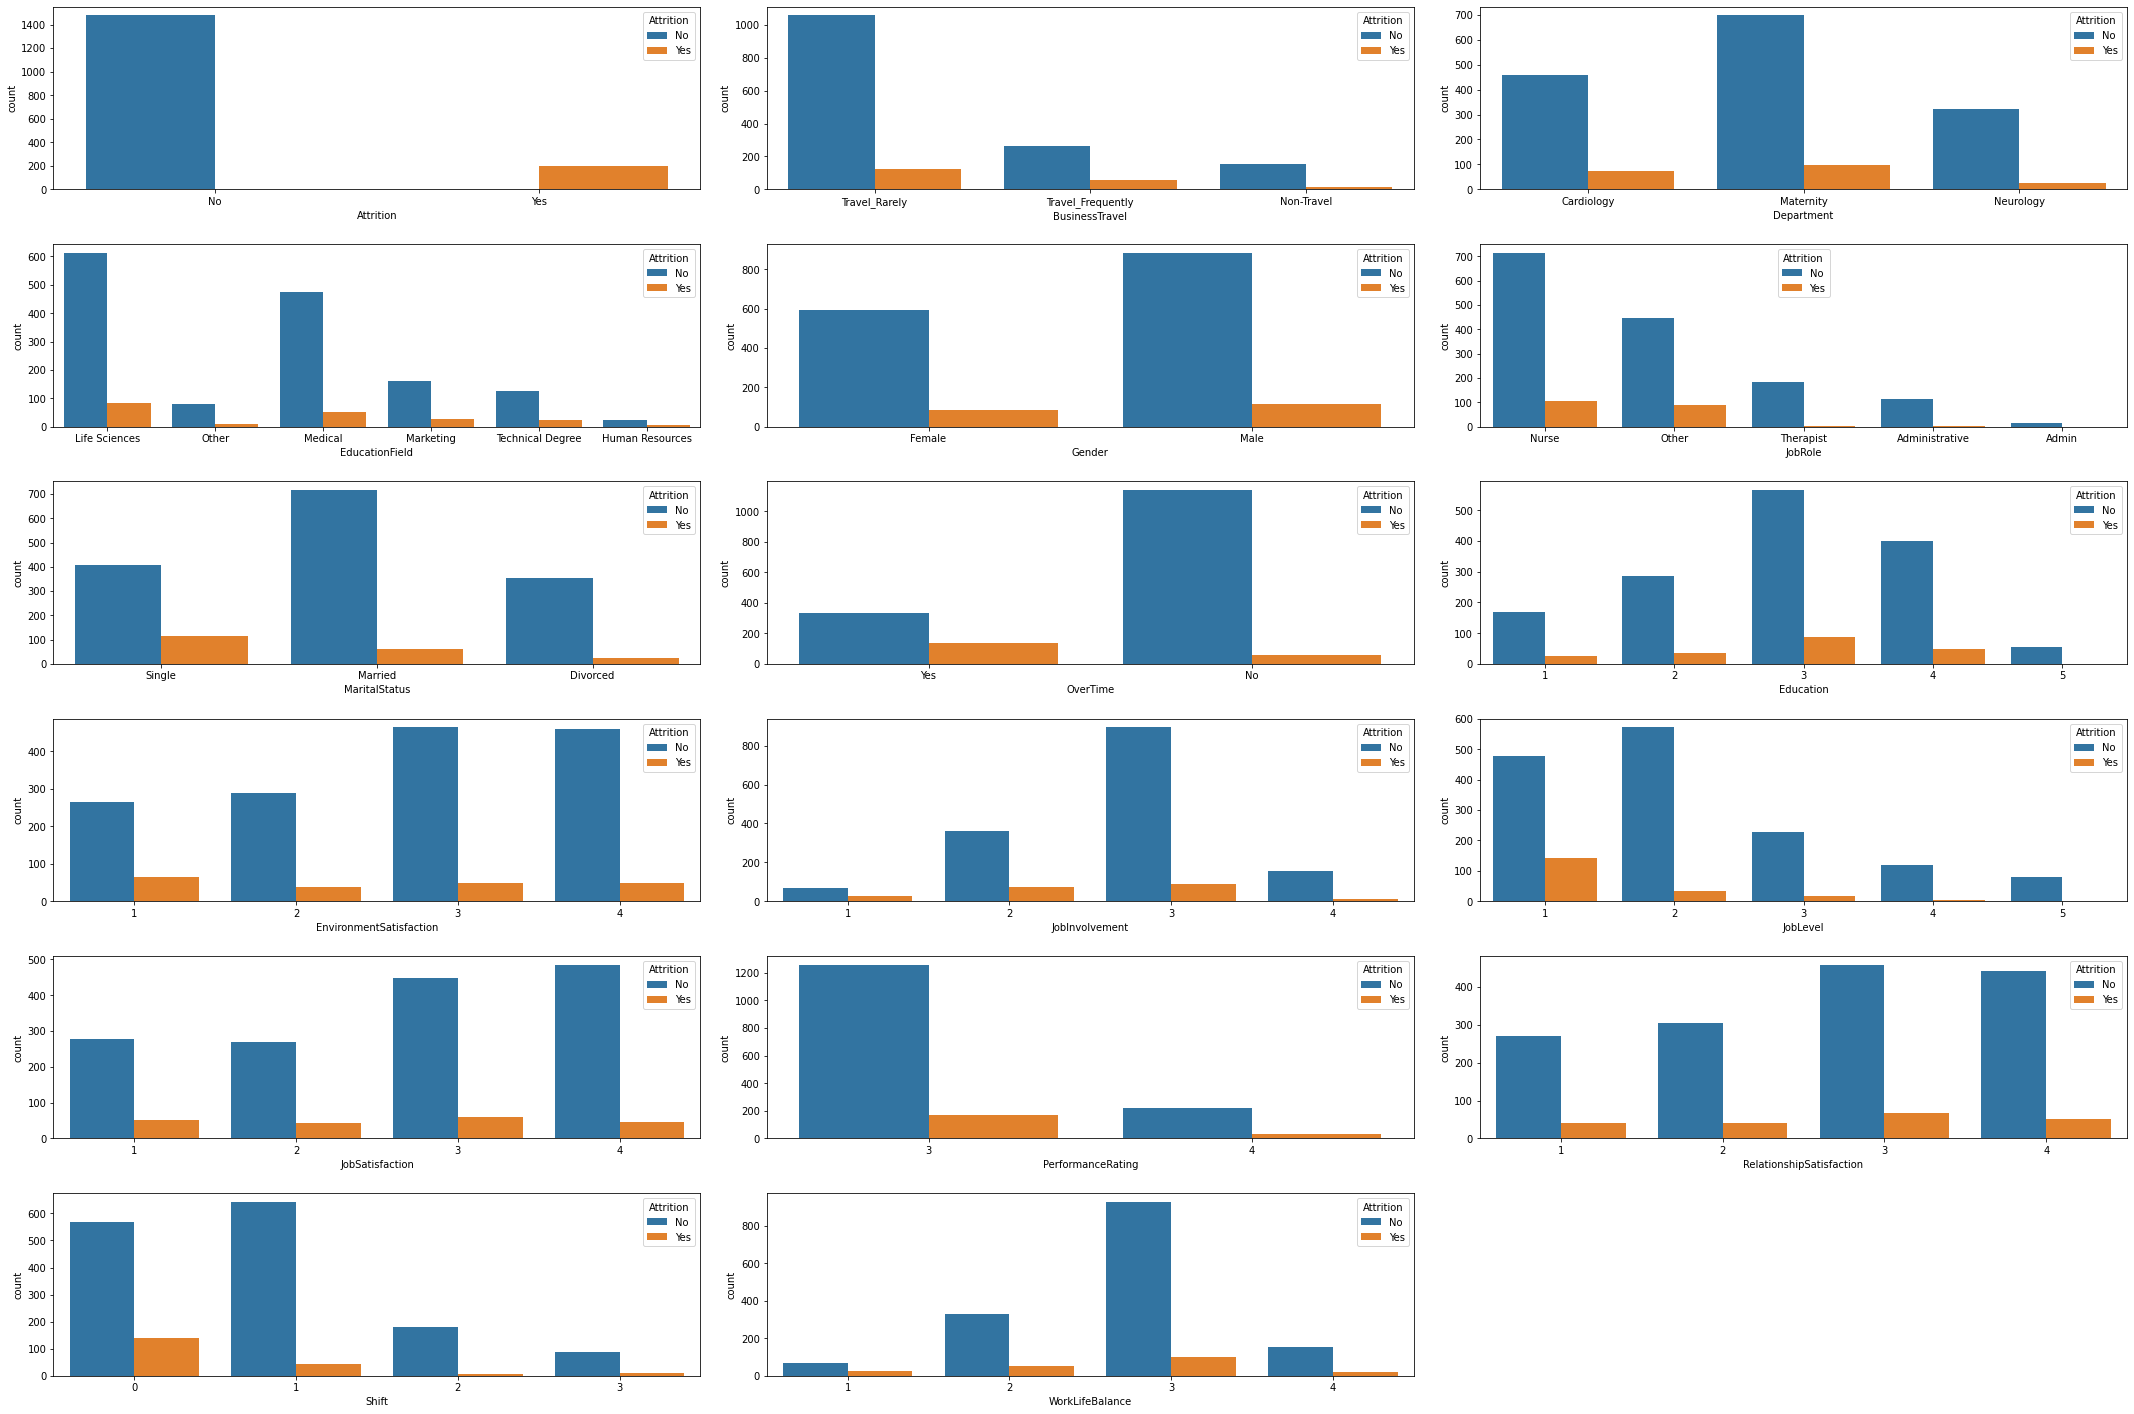

In [65]:
a = df[['Attrition','BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole', 'MaritalStatus', 'OverTime','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','Shift','WorkLifeBalance']]

plt.figure(figsize=(30,20))
for index,column in enumerate(a):
    plt.subplot(6,3,index+1)
    sns.countplot(data=a, x=column, hue=df.Attrition)
    
plt.tight_layout(pad = 2.0)

<AxesSubplot:>

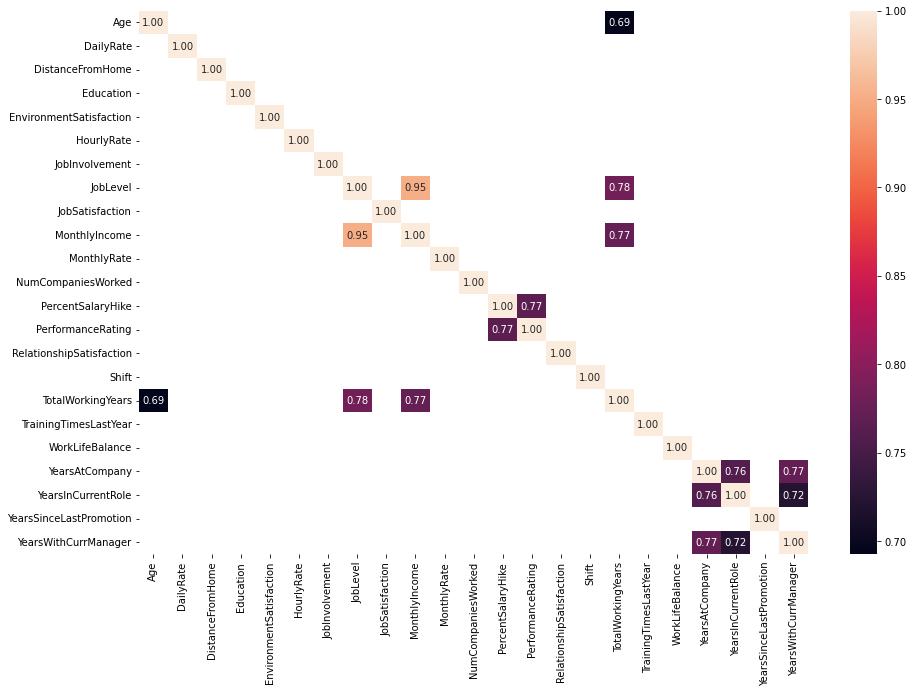

In [66]:
correlation = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(correlation,mask = correlation < 0.67,annot=True, fmt='0.2f')

In [67]:
listCategorialColumns = df.select_dtypes(include = 'object').columns.to_list()
labelencoder = LabelEncoder()
for i in listCategorialColumns:
    df[i] = labelencoder.fit_transform(df[i])

In [68]:
X = df.drop("Attrition",axis = 1)
y =  df["Attrition"]

In [69]:
print(X.columns)
print(X.shape)

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
(1676, 30)


In [72]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled=pd.DataFrame(X_scaled)
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.452933,0.594253,0.750837,-1.244242,-1.008126,-0.884927,-0.931889,-0.651470,-1.213250,1.412260,...,-0.420674,-1.594279,-0.942491,-0.426280,-2.178097,-2.515254,-0.169491,-0.073053,-0.681553,0.242949
1,1.329511,-0.905700,-1.299105,0.151574,-0.149829,-1.860033,-0.931889,0.259935,0.824232,-0.221278,...,2.377140,1.189066,0.226728,-0.170938,0.151012,0.333101,0.486551,0.754220,-0.371823,0.804968
2,0.014644,0.594253,1.425849,0.151574,-0.885512,-0.884927,1.333845,1.171341,0.824232,1.313258,...,-0.420674,-0.666497,-0.942491,-0.553950,0.151012,0.333101,-1.153553,-1.176083,-0.681553,-1.162098
3,-0.423644,-0.905700,1.473174,0.151574,-0.762898,1.065286,-0.931889,1.171341,-1.213250,-0.468784,...,-0.420674,0.261285,-0.942491,-0.426280,0.151012,0.333101,0.158530,0.754220,0.247636,-1.162098
4,-1.081078,0.594253,-0.521970,0.151574,-0.885512,-1.860033,0.578601,-1.562875,0.824232,-1.260803,...,-0.420674,1.189066,0.226728,-0.681621,0.151012,0.333101,-0.825533,-0.624568,-0.062094,-0.600079


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [80]:
print("Training size: ", len(X_train))
print("Testing size: ", len(X_test))

Training size:  1340
Testing size:  336
